In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# Load data

In [2]:
data = pd.read_csv('data.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data = data.rename(columns={"class": "class_param"})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2.0,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
 # где-то плохая обработка, потому что классов только 4. Уберём плохие
data['class_param'].unique()

array([ 2.,  4.,  1.,  3.,  0., nan])

In [4]:
data.class_param.fillna(0, inplace=True)
data = data.query('class_param != 0')
data['class_param'].unique()

array([2., 4., 1., 3.])

In [5]:
data = data.astype({'class_param': 'int'})
data.head()

,class_param,sns_1_sct_1_plus,sns_1_sct_1_minus,sns_1_sct_2_plus,sns_1_sct_2_minus,sns_1_sct_3_plus,sns_1_sct_3_minus,sns_1_sct_4_plus,sns_1_sct_4_minus,sns_1_sct_5_plus,...,sns_3_sct_28_plus,sns_3_sct_28_minus,sns_3_sct_29_plus,sns_3_sct_29_minus,sns_3_sct_30_plus,sns_3_sct_30_minus,sns_3_sct_31_plus,sns_3_sct_31_minus,sns_3_sct_32_plus,sns_3_sct_32_minus
0,2,1.070476,1.134191,1.061568,1.063757,1.056732,1.071109,1.063262,1.074886,1.249140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,1.062580,0.000000,0.000000,0.000000,1.610508,1.232604,0.000000,1.184101,1.320536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.067535,1.051729,1.054481,1.057698,1.055646,1.062432,1.071453,1.064985,1.065528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.088980,1.055896,1.061196,1.138536,1.091437,1.074876,1.061321,1.082646,1.095676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1.081317,1.061869,1.053991,1.112041,1.073001,1.089580,1.092859,1.097151,1.048954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

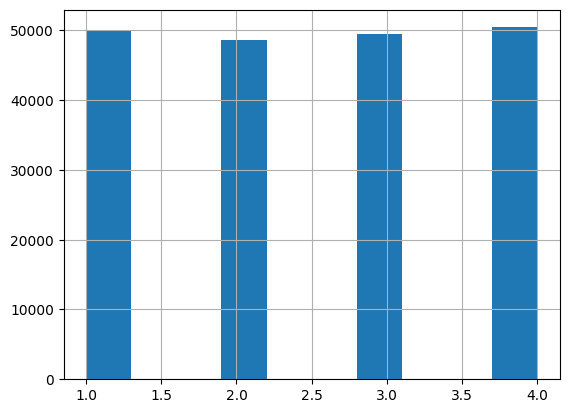

In [6]:
data.class_param.hist()

In [7]:
data.shape

(198649, 193)

# Models

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Y = data['class_param']
X = data.drop(columns='class_param')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((139054, 192), (59595, 192), (139054,), (59595,))

## XGBoost

In [11]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

le = LabelEncoder()

# сделаем преобразование классов, для работы алгоритма
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train, y_test

(array([2, 1, 0, ..., 3, 3, 0]), array([0, 3, 1, ..., 1, 0, 0]))

In [12]:
# шаг и дипазон learning_rate можно увеличить
params = {'n_estimators': range(50, 301, 50), 'max_depth': range(5, 8), 'learning_rate': np.arange(0.01, 0.101, 0.05)}

xgb_cl = XGBClassifier(tree_method='gpu_hist')
xgb_cv = GridSearchCV(xgb_cl, params, cv=4)

In [13]:
xgb_cv.fit(X_train.values, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.01, 0.06]),
                         'max_depth': range(5, 8),
                         'n_estimators': range(50, 301, 50)})

In [14]:
xgb_cv.best_params_, xgb_cv.best_score_

({'learning_rate': 0.060000000000000005, 'max_depth': 7, 'n_estimators': 300},
 0.8617299643092042)

In [15]:
xgb_res_df = pd.DataFrame(xgb_cv.cv_results_)
xgb_res_df.drop(columns=["params"], inplace=True)
xgb_res_df.shape

(36, 14)

In [16]:
xgb_res_df.sort_values('rank_test_score', ascending=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,14.509625,0.030936,1.157449,0.009633,0.06,7,300,0.863364,0.861638,0.858067,0.863849,0.861730,0.002269,1
23,9.237088,0.318658,0.872124,0.196705,0.06,5,300,0.861696,0.861869,0.857147,0.864569,0.861320,0.002665,2
34,13.173404,0.489754,1.525919,0.122669,0.06,7,250,0.863364,0.860660,0.857435,0.863533,0.861248,0.002479,3
29,11.694337,0.463488,0.943074,0.008750,0.06,6,300,0.861725,0.861437,0.856744,0.864367,0.861068,0.002745,4
28,9.711411,0.076903,0.899038,0.170247,0.06,6,250,0.861581,0.861380,0.855737,0.864511,0.860802,0.003176,5


<Axes: xlabel='param_n_estimators', ylabel='mean_test_score'>

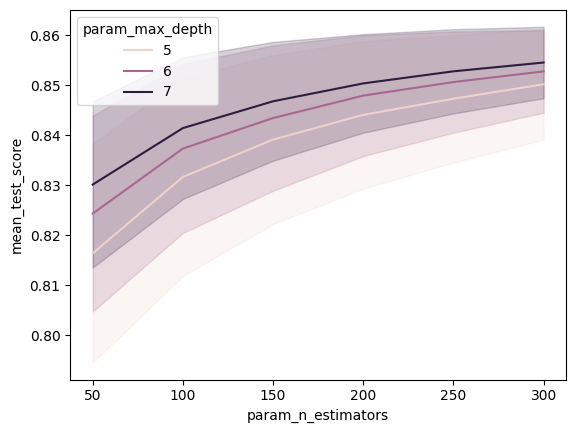

In [17]:
sns.lineplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=xgb_res_df)

In [18]:
best_xgb = xgb_cv.best_estimator_

In [19]:
y_pred = best_xgb.predict(X_test)

metrics.accuracy_score(y_test, y_pred) # значенния accuracy

0.8604916519842268

In [20]:
train_score = best_xgb.score(X_train, y_train)
test_score = best_xgb.score(X_test, y_test)

train_score, test_score

(0.9466825837444446, 0.8604916519842268)

In [21]:
feature_importances = best_xgb.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances_': feature_importances})
feature_importances_df.sort_values('feature_importances_', ascending=False)
feature_importances_df

,features,feature_importances_
0,sns_1_sct_1_plus,0.040498
1,sns_1_sct_1_minus,0.016129
2,sns_1_sct_2_plus,0.009753
3,sns_1_sct_2_minus,0.013351
4,sns_1_sct_3_plus,0.012940
...,...,...
187,sns_3_sct_30_minus,0.000000
188,sns_3_sct_31_plus,0.000000
189,sns_3_sct_31_minus,0.000000
190,sns_3_sct_32_plus,0.000000


<Axes: >

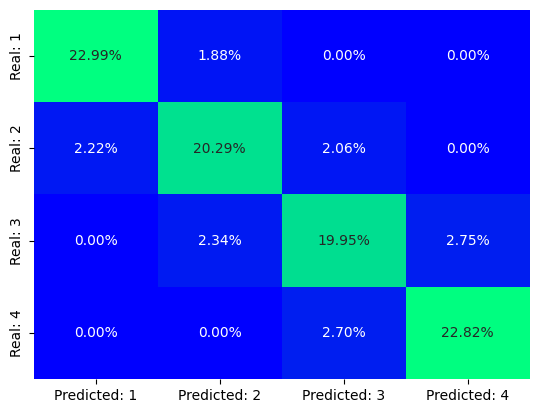

In [22]:
y_pred = best_xgb.predict(X_test)

x_names = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4']
y_names = ['Real: 1', 'Real: 2', 'Real: 3', 'Real: 4']

arr_errors = (metrics.confusion_matrix(y_test, y_pred) / y_test.shape[0])
sns.heatmap(arr_errors, cmap='winter', annot=True, fmt=".2%", cbar=False, xticklabels=x_names, yticklabels=y_names)

In [23]:
import pickle

with open('best_XGBmodel.pkl', 'wb') as f: # сохранили лучшую модель xgboost
    pickle.dump(best_xgb, f)

### Load model

In [24]:
import pickle

with open('best_XGBmodel.pkl', 'rb') as f:
    best_xgb = pickle.load(f)

best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.060000000000000005,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## CatBoost

In [25]:
%%capture
! pip install catboost

In [26]:
from catboost import CatBoostClassifier, Pool

In [27]:
cat_clf = CatBoostClassifier(iterations=300, learning_rate=0.1, max_depth=8,
                             loss_function='MultiClass', task_type='GPU')

In [28]:
cat_clf.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=59)

0:	learn: 1.2511763	test: 1.2518940	best: 1.2518940 (0)	total: 45.9ms	remaining: 13.7s
59:	learn: 0.3478504	test: 0.3641163	best: 0.3641163 (59)	total: 1.48s	remaining: 5.92s
118:	learn: 0.3035185	test: 0.3325222	best: 0.3325222 (118)	total: 2.53s	remaining: 3.84s
177:	learn: 0.2846120	test: 0.3243166	best: 0.3243166 (177)	total: 3.73s	remaining: 2.56s
236:	learn: 0.2721516	test: 0.3212185	best: 0.3212185 (236)	total: 6.38s	remaining: 1.7s
295:	learn: 0.2617121	test: 0.3195184	best: 0.3195184 (295)	total: 11.7s	remaining: 158ms
299:	learn: 0.2612212	test: 0.3194618	best: 0.3194503 (298)	total: 12.3s	remaining: 0us
bestTest = 0.3194503327
bestIteration = 298
Shrink model to first 299 iterations.


In [29]:
train_score = cat_clf.score(X_train, y_train)
test_score = cat_clf.score(X_test, y_test)

train_score, test_score

(0.8921426208523308, 0.8612635288195318)

In [30]:
feature_importances = cat_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances_': feature_importances})
feature_importances_df.sort_values('feature_importances_', ascending=False)
feature_importances_df

,features,feature_importances_
0,sns_1_sct_1_plus,2.279389
1,sns_1_sct_1_minus,1.999056
2,sns_1_sct_2_plus,1.613789
3,sns_1_sct_2_minus,1.634472
4,sns_1_sct_3_plus,1.465778
...,...,...
187,sns_3_sct_30_minus,0.000000
188,sns_3_sct_31_plus,0.000000
189,sns_3_sct_31_minus,0.000000
190,sns_3_sct_32_plus,0.000000


<Axes: >

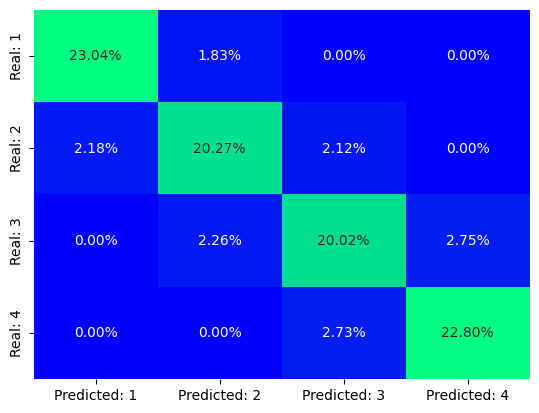

In [31]:
y_pred = cat_clf.predict(X_test)

x_names = ['Predicted: 1', 'Predicted: 2', 'Predicted: 3', 'Predicted: 4']
y_names = ['Real: 1', 'Real: 2', 'Real: 3', 'Real: 4']

arr_errors = (metrics.confusion_matrix(y_test, y_pred) / y_test.shape[0])
sns.heatmap(arr_errors, cmap='winter', annot=True, fmt=".2%", cbar=False, xticklabels=x_names, yticklabels=y_names)

In [32]:
with open('cat_model.pkl', 'wb') as f: # сохранили модель cat_boost
    pickle.dump(best_xgb, f)